<hr style="border:2px solid gray">

# Exploratory Data Analysis
*Task:* Explore the data

***Contributors***
- Hernan
- Carter

<hr style="border:2px solid gray">


Importing modules

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

Reading in the data.

In [ ]:
os.listdir('./drive/Shareddrives/420project/data')

['amsterdam_weekends.csv',
 'london_weekends.csv',
 'amsterdam_weekdays.csv',
 'lisbon_weekends.csv',
 'barcelona_weekdays.csv',
 'london_weekdays.csv',
 'berlin_weekends.csv',
 'lisbon_weekdays.csv',
 'athens_weekends.csv',
 'athens_weekdays.csv',
 'budapest_weekdays.csv',
 'berlin_weekdays.csv',
 'budapest_weekends.csv',
 'barcelona_weekends.csv',
 'vienna_weekdays.csv',
 'paris_weekdays.csv',
 'vienna_weekends.csv',
 'rome_weekends.csv',
 'rome_weekdays.csv',
 'paris_weekends.csv']

In [ ]:
df = pd.DataFrame()
for filename in os.listdir('./drive/Shareddrives/420project/data'):
  newdf = pd.read_csv(f'./drive/Shareddrives/420project/data/{filename}')
  newdf['city'] = filename.split('_')[0]
  newdf['listing_days'] = filename.split('_')[1].split('.')[0]
  df = pd.concat([df, newdf ], ignore_index=True, axis=0)


In [ ]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,listing_days
0,0,319.640053,Private room,False,True,2.0,False,0,1,9.0,...,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137,amsterdam,weekends
1,1,347.995219,Private room,False,True,2.0,False,0,1,9.0,...,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103,amsterdam,weekends
2,2,482.975183,Private room,False,True,4.0,False,0,1,9.0,...,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663,amsterdam,weekends
3,3,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508,amsterdam,weekends
4,4,2771.541724,Entire home/apt,False,False,4.0,True,0,0,10.0,...,1.686798,1.458399,208.809162,11.055489,272.315202,23.739349,4.88467,52.38749,amsterdam,weekends


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

Checking for null values

In [ ]:
df.isna().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
listing_days                  0
dtype: int64

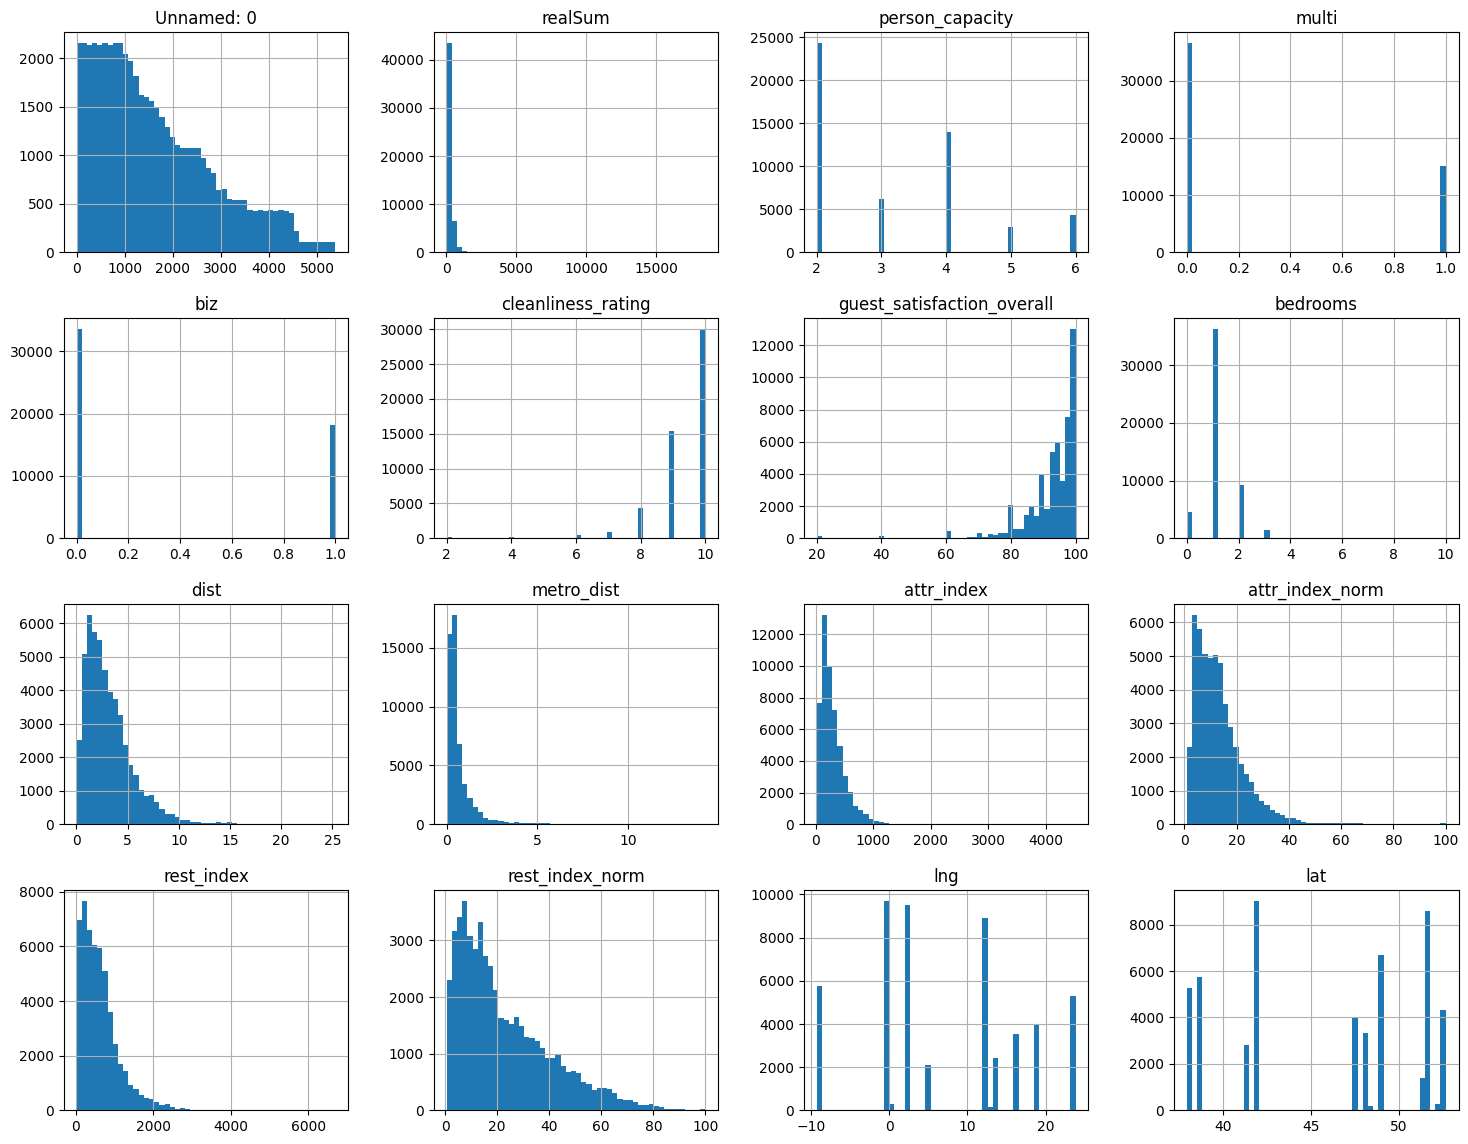

In [ ]:
df.hist(bins=50, figsize=(18, 14))
plt.show()

We can see that the majority of the graphs are skewed right. This means there are extreme data point (outliers) that are making the graphs look like this. A good example of this is the rest_index_norm graph. Then we have pretty clear graphs like the bedrooms one that says to us the # of rooms the airbnb has, and there are no outliers the range of rooms is from 0-4.

<ipython-input-86-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

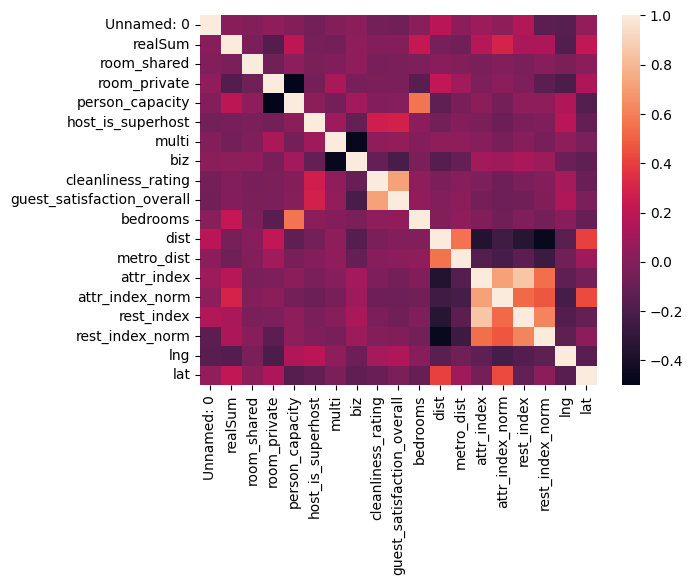

In [ ]:
sns.heatmap(df.corr())

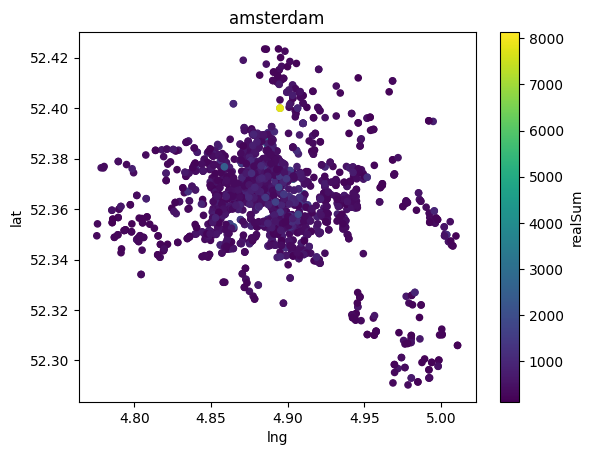

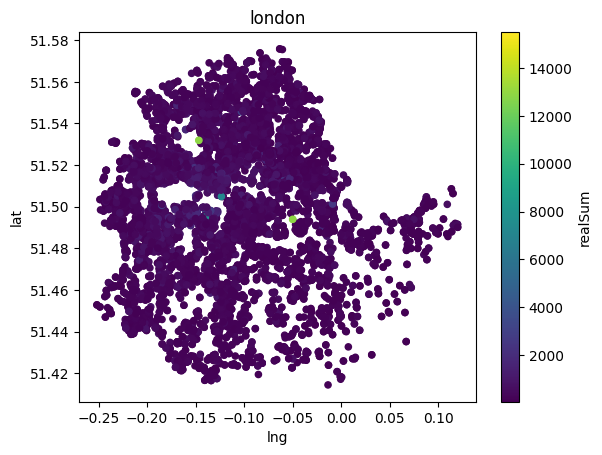

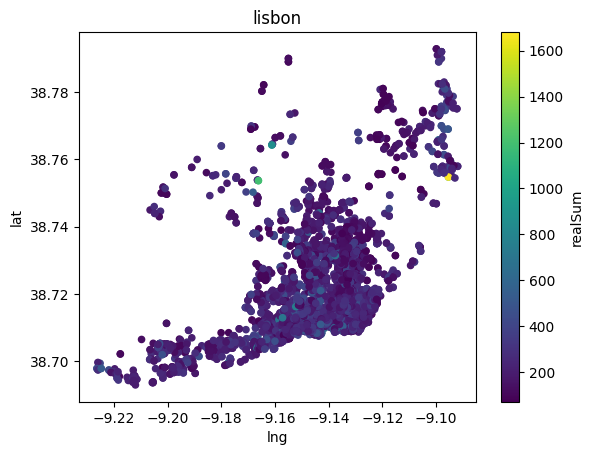

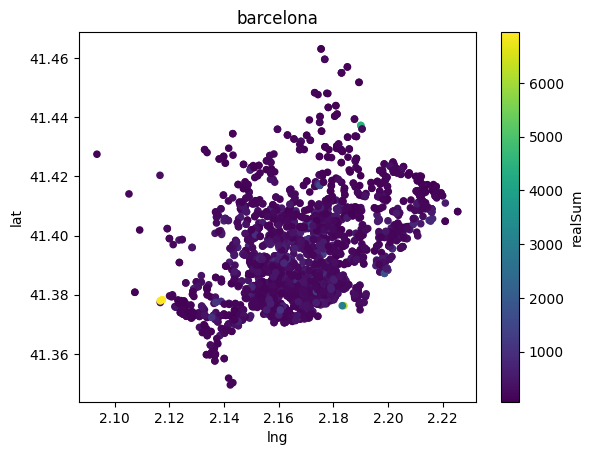

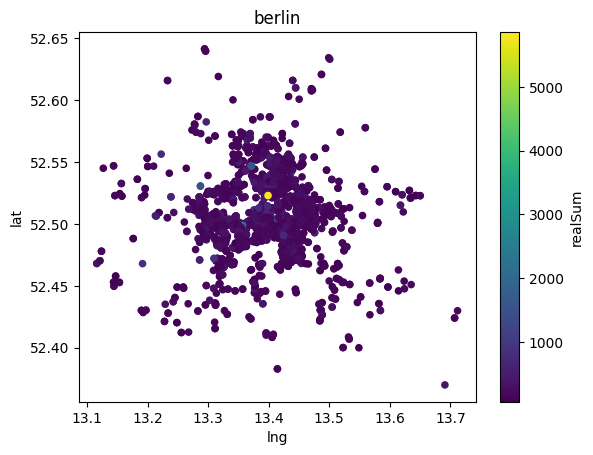

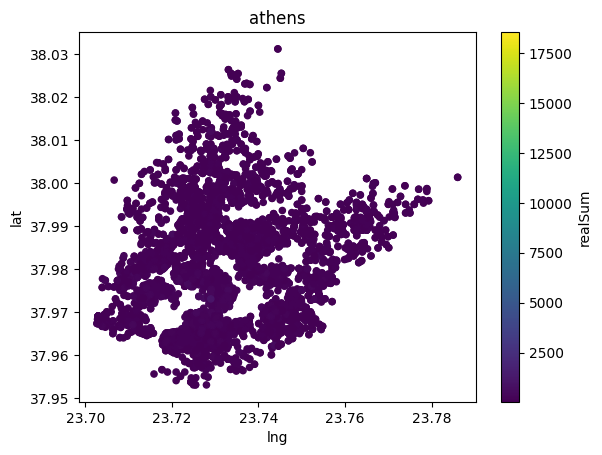

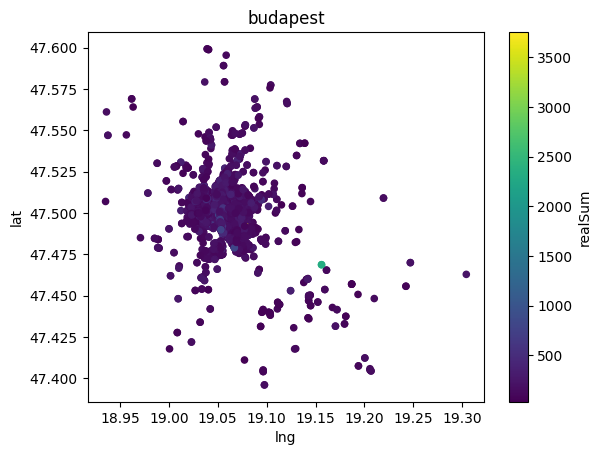

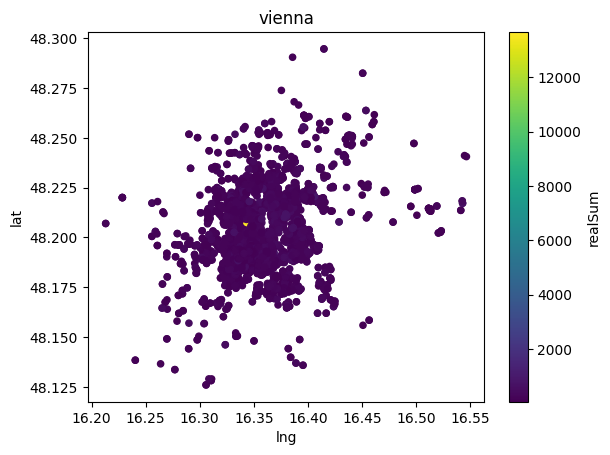

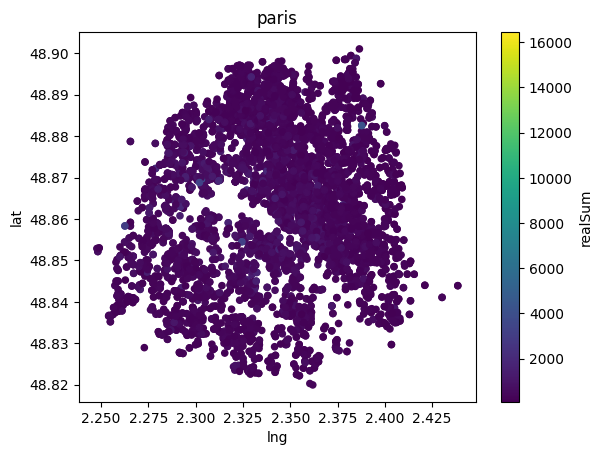

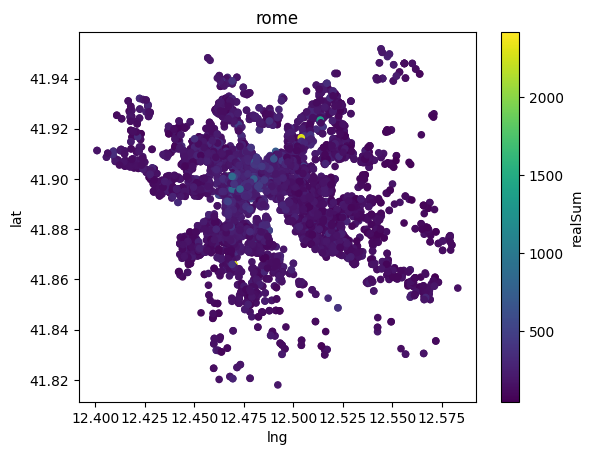

In [ ]:
for city in df['city'].unique():
  df.loc[df['city'] == city].plot.scatter(x='lng',y='lat', c='realSum')
  plt.title(city)


This scatter plots are pretty clear. They tell us the location of the Airbnb's regarding the latitude and longitude. We can see that majority of them are very clustered. A good example is the Athens plot; we can also say the London one is clustered. Then we have plots we a bunch of outliers like the Berlin scatter plot, this plot indicates that there are data points that significantly deviate from the overall pattern or trend of the data. Furthermore, the Barcelona plot is decently clustered but has a decent amount of outliers, the same as the Lisbon and Amsterdam plots.


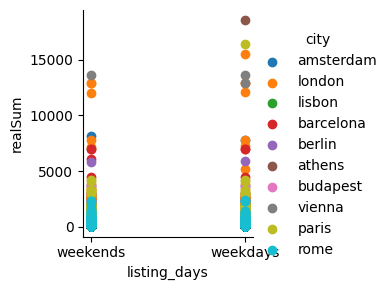

In [ ]:
sns.FacetGrid(df, hue="city") \
   .map(plt.scatter, "listing_days", "realSum") \
   .add_legend()

In this scatter plot, we see the correlation between the realSum and the listing-days of the Airbnb data. We can see that the weekends and the weekdays have almost an identical trend until the price of 10000. We can see the trend that Rome on both weekends and weekdays has the cheapest price along with Paris. Also, we can see the trend that London and Vienna are on the pricier side of the price.


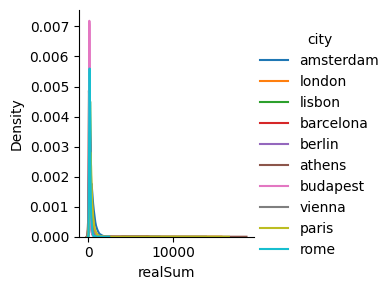

In [ ]:
sns.FacetGrid(df, hue="city") \
   .map(sns.kdeplot, "realSum") \
   .add_legend()

I can see the same trend in this graph as in the one before. The cheapest Airbnb are the ones located in Rome and those Airbnbs are the most common ones, but now we also see that these are the most dense ones, but not the most dense. Most Airbnb's given the cheapest price are the ones located in Budapest. This plot gives us a trend that the majority of the Airbnbs are in the same price (realSum) range.

In [ ]:
df.dtypes

realSum                       float64
room_type                      object
room_shared                     int64
room_private                    int64
person_capacity               float64
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
listing_days                   object
dtype: object

realSum: The total price of the Airbnb listing. (Numeric)

room_type: The type of room being offered (e.g. private, shared, etc.). (Categorical)

room_shared: Whether the room is shared or not. (Boolean)

room_private: Whether the room is private or not. (Boolean)

person_capacity:The maximum number of people that can stay in the room. (Numeric)

host_is_superhost: Whether the host is a superhost or not. (Boolean)

multi:	Whether the listing is for multiple rooms or not. (Boolean)

biz:	Whether the listing is for business purposes or not. (Boolean)

cleanliness_rating:	The cleanliness rating of the listing. (Numeric)

guest_satisfaction_overall:	The overall guest satisfaction rating of the listing. (Numeric)

bedrooms:	The number of bedrooms in the listing. (Numeric)

dist:	The distance from the city centre. (Numeric)

metro_dist:	The distance from the nearest metro station. (Numeric)

lng:	The longitude of the listing. (Numeric)

lat:	The latitude of the listing. (Numeric)